In [7]:
import os
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import ticker

In [8]:
path = os.getcwd()
folder= path + "/dataset/series_boyas/resolucion/"
print(folder)

/home/jorge/tsunami-warning/dataset/series_boyas/resolucion/


## Se visualiza la imagen con las boyas graficadas
Para tener un apoyo vizual de la ubicación de cada una de estas.

In [3]:
from PIL import Image 
I = Image.open(path+"/dataset/boyas/L3_Vdat.png",'r')
I.show()

## Ingresar número de boya y magnitud sismo.

In [13]:
boyas = [3,4,6,21,22,15,16,18,0,7,9,11 ]   # numeros boyas
sismo = 88    # magnitud 85, 90 ,95

In [14]:
files = []
for file in os.listdir(folder):
    if file.endswith(str(sismo)+".nc"):
        files.append(file)
files.sort()
print(files)

['layer01_tsE188.nc', 'layer01_tsE288.nc']


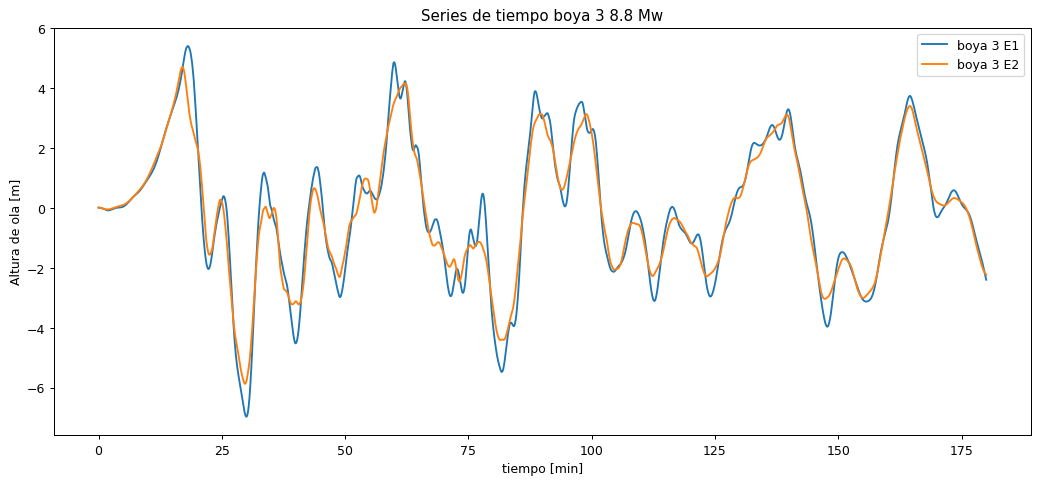

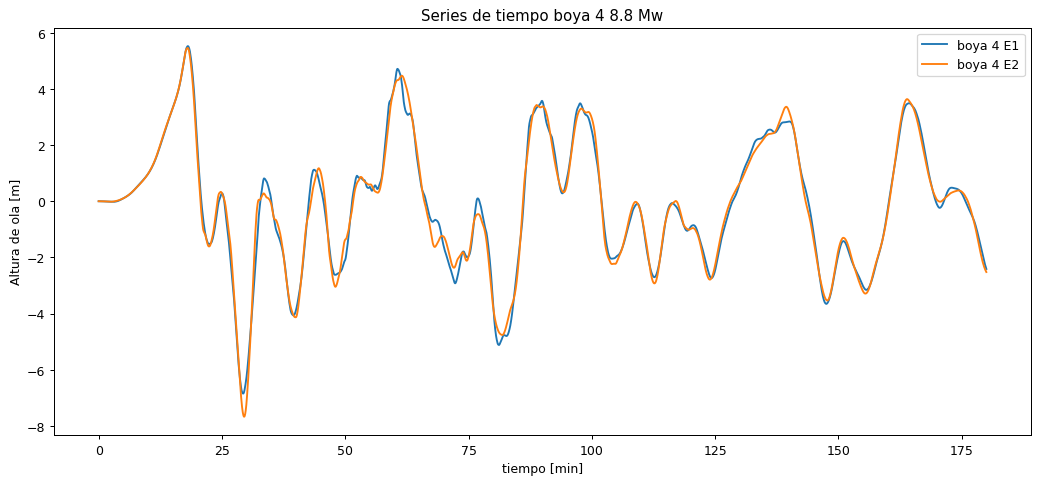

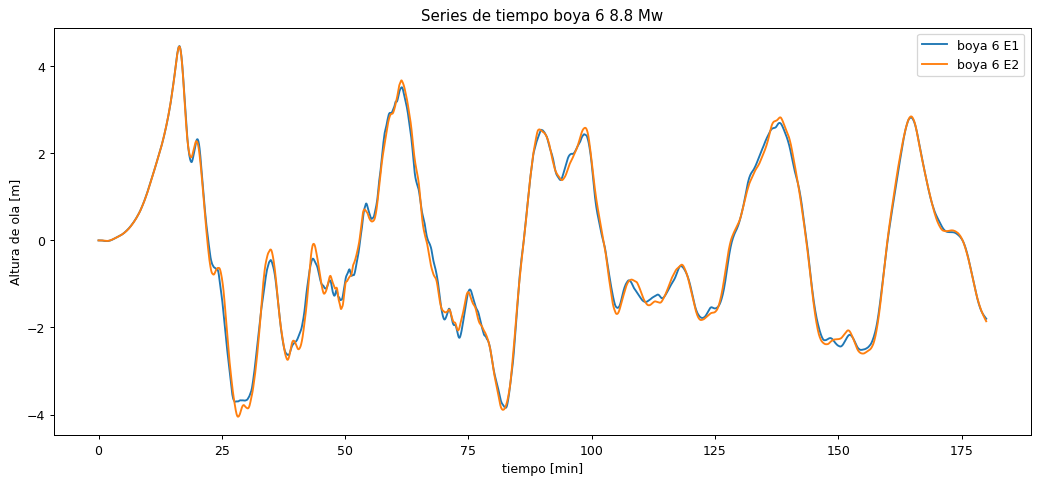

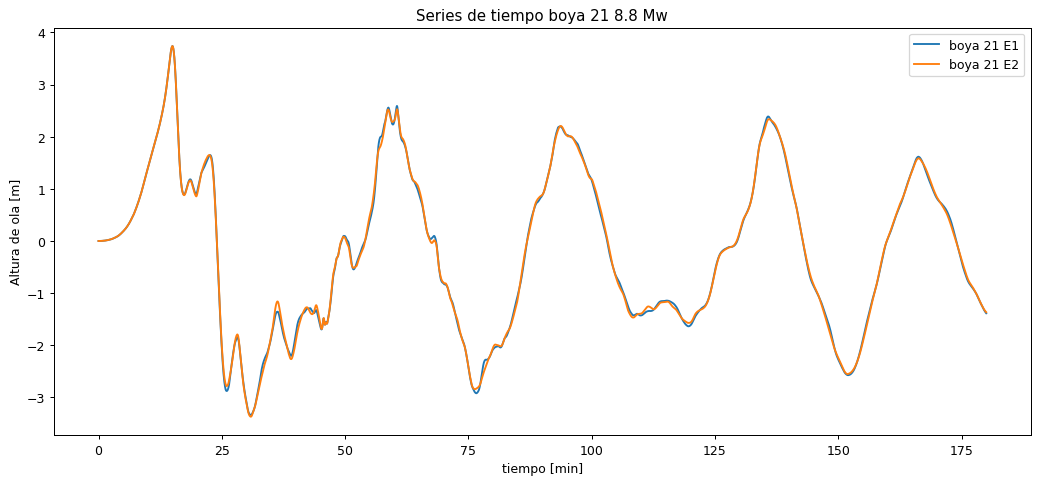

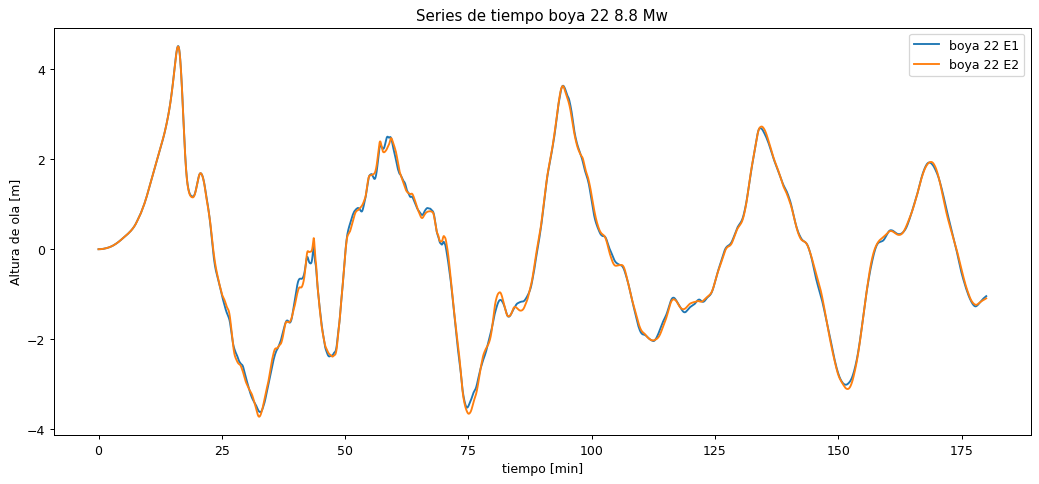

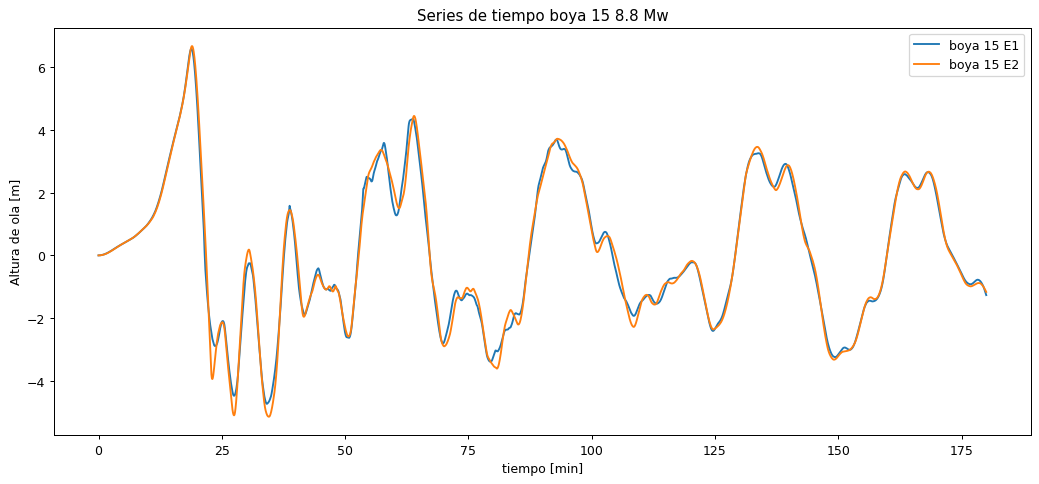

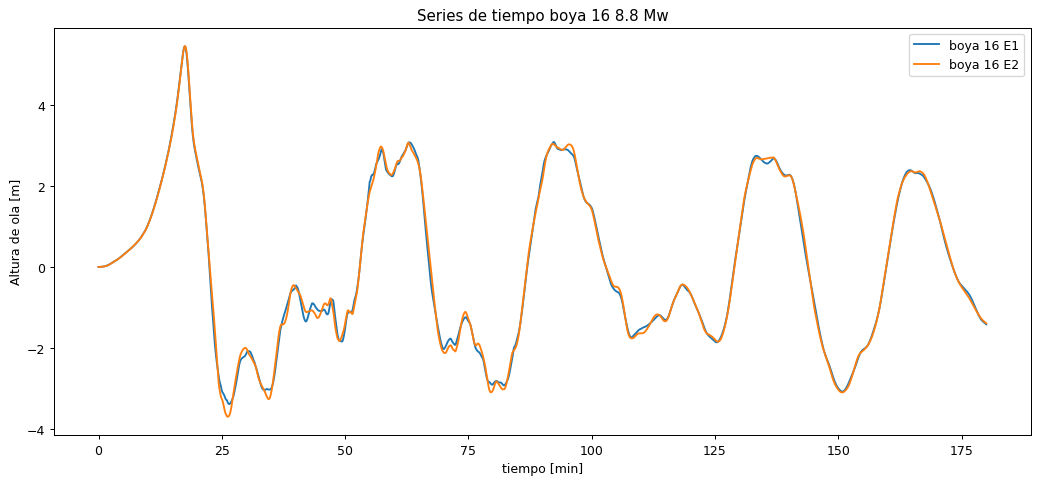

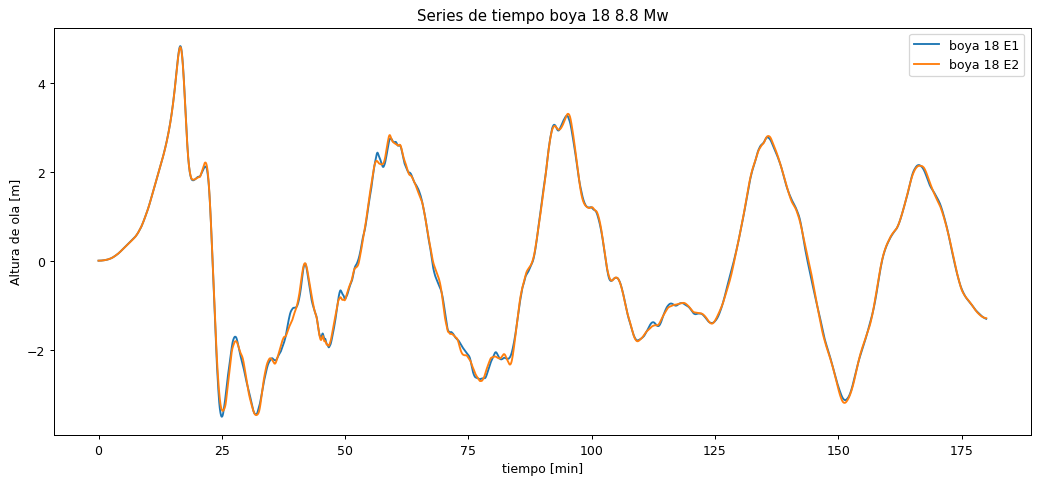

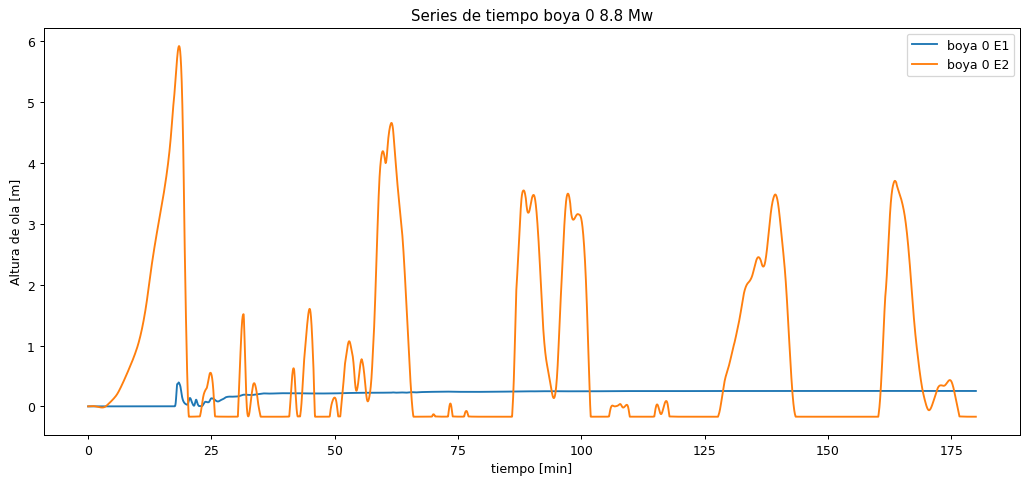

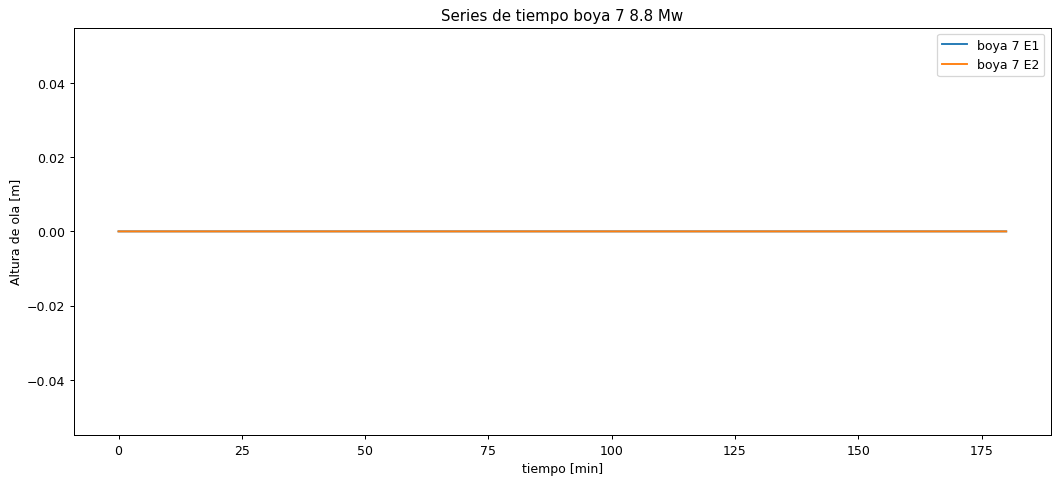

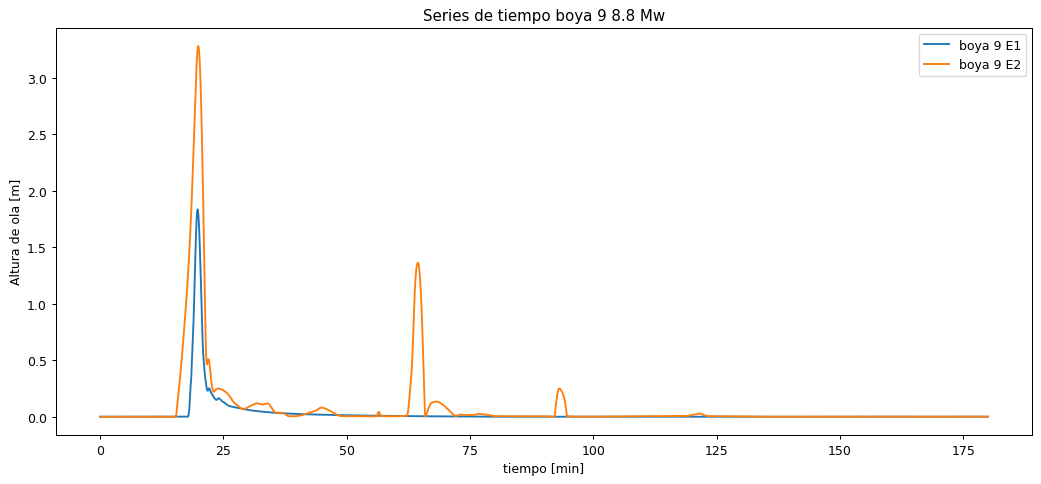

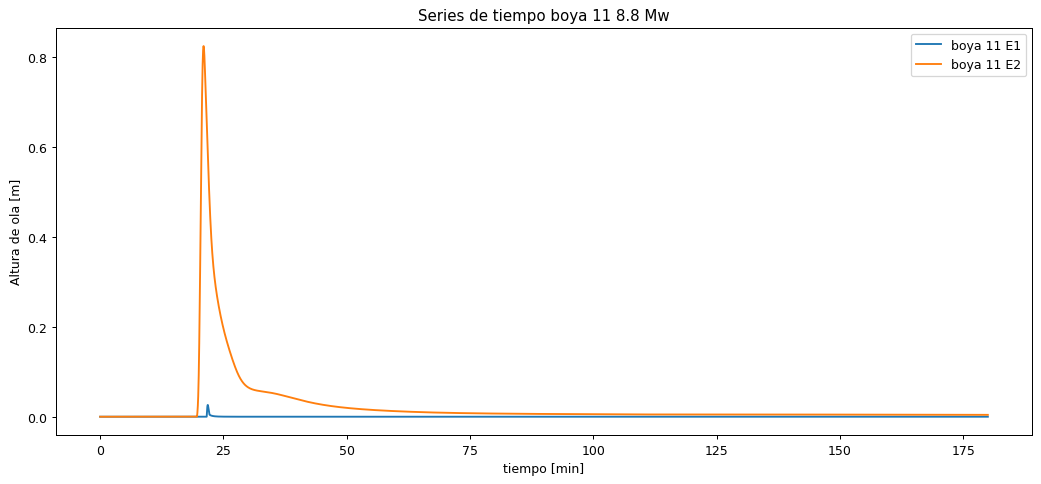

In [18]:
for i in boyas:
    figure = plt.figure(figsize=(14,6), dpi=90)
    for file in files:
        rutafile = folder  + file
        f=Dataset(rutafile,'r') # abrir file
        time = f.variables['time'][:]/60 
        eta = f.variables['eta'][:,i] -f.variables['eta'][:,i][0]# inundacion
        plt.plot(time,eta,label = 'boya '+str(i)+' '+file[-7:-5])
        plt.title('Series de tiempo boya '+ str(i) +' '+ file[-5]+'.'+file[-4]+' Mw')
        plt.ylabel('Altura de ola [m]')
        plt.ylabel('Altura de ola [m]')
        plt.xlabel('tiempo [min]')
        plt.legend(loc='upper right')
    folderout = folder+'resolucion'+file[-5]+'.'+file[-4]
    if not os.path.exists(folderout): # crea folder si no existe
        os.makedirs(folderout)

    figure.savefig(folderout+'/Series de tiempo boya '+ str(i) +' '+ file[-5]+'.'+file[-4]+' Mw'+'.png',
                  dpi=300,bbox_inches = 'tight',pad_inches = 0)
    plt.show()